In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data source:
[databank](https://databank.worldbank.org/reports.aspx?source=2&series=SL.UEM.TOTL.ZS&country=DEU#)

In [72]:
path = r'C:\Users\matte\OneDrive\Desktop\GitHub\data\minimun w eff\P_Data_Extract_From_World_Development_Indicators.xls'

df = pd.read_excel(path).drop(columns=['Series Name','Series Code'])

df.head()

,Country Name,Country Code,1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Germany,DEU,6.875,6.608,6.813,6.319,5.705,4.89,5.316,6.323,...,6.967,5.825,5.379,5.231,4.981,4.624,4.122,3.746,3.384,3.136
1,Austria,AUT,3.6,3.12,3.79,3.55,3.14,3.25,5.860,3.590,...,4.883,4.637,4.909,5.367,5.674,5.802,6.064,5.561,4.933,4.560
2,Denmark,DNK,7.797,6.033,6.091,6.486,8.149,8.338,8.890,9.027,...,7.747,7.769,7.798,7.384,6.925,6.278,5.989,5.833,5.131,5.018
3,Finland,FIN,5,5.32,5.07,4.47,3.14,3.069,6.503,11.595,...,8.394,7.781,7.689,8.193,8.663,9.376,8.818,8.640,7.361,6.695
4,Sweden,SWE,2.83,2.23,2.15,..,1.46,1.832,3.243,5.722,...,8.610,7.804,7.976,8.052,7.954,7.432,6.990,6.718,6.365,6.833


In [77]:
df.rename(columns={'Country Name':'name', 'Country Code':'code'}, inplace=True)

df.rename(columns={old_c: new_c for old_c, new_c in zip(df.columns.to_list()[2:], range(1985, 2020))},
          inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    9 non-null      object 
 1   code    9 non-null      object 
 2   1985    9 non-null      object 
 3   1986    9 non-null      object 
 4   1987    9 non-null      object 
 5   1988    9 non-null      object 
 6   1989    9 non-null      object 
 7   1990    9 non-null      object 
 8   1991    9 non-null      float64
 9   1992    9 non-null      float64
 10  1993    9 non-null      float64
 11  1994    9 non-null      float64
 12  1995    9 non-null      float64
 13  1996    9 non-null      float64
 14  1997    9 non-null      float64
 15  1998    9 non-null      float64
 16  1999    9 non-null      float64
 17  2000    9 non-null      float64
 18  2001    9 non-null      float64
 19  2002    9 non-null      float64
 20  2003    9 non-null      float64
 21  2004    9 non-null      float64
 22  2005  

In [79]:
# Iceland is missing some data from 1985 to 1990
# I drop it

df.drop(columns=[1985,1986,1987,1988,1989,1990], inplace=True)

In [80]:
df.head()

,name,code,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Germany,DEU,5.316,6.323,7.675,8.727,8.158,8.822,9.861,9.787,...,6.967,5.825,5.379,5.231,4.981,4.624,4.122,3.746,3.384,3.136
1,Austria,AUT,5.860,3.590,4.250,3.535,4.353,5.291,5.157,5.493,...,4.883,4.637,4.909,5.367,5.674,5.802,6.064,5.561,4.933,4.560
2,Denmark,DNK,8.890,9.027,10.719,8.036,6.992,6.844,5.400,5.039,...,7.747,7.769,7.798,7.384,6.925,6.278,5.989,5.833,5.131,5.018
3,Finland,FIN,6.503,11.595,16.201,16.426,19.780,15.572,14.968,13.215,...,8.394,7.781,7.689,8.193,8.663,9.376,8.818,8.640,7.361,6.695
4,Sweden,SWE,3.243,5.722,9.330,9.580,8.897,9.547,10.359,8.941,...,8.610,7.804,7.976,8.052,7.954,7.432,6.990,6.718,6.365,6.833


In [94]:
df = (df.drop(columns='code')
    .T)
df = df.rename(columns=df.iloc[0]).drop('name')

df.head()

,0,1,2,3,4,5,6,7,8
name,Germany,Austria,Denmark,Finland,Sweden,Italy,Iceland,Norway,Switzerland
1991,5.316,5.86,8.89,6.503,3.243,10.097,2.548,5.407,1.818
1992,6.323,3.59,9.027,11.595,5.722,9.321,4.305,5.91,2.344
1993,7.675,4.25,10.719,16.201,9.33,10.212,5.257,5.965,3.551
1994,8.727,3.535,8.036,16.426,9.58,11.086,5.326,5.349,3.58


In [98]:
df.head()

,Germany,Austria,Denmark,Finland,Sweden,Italy,Iceland,Norway,Switzerland
1991,5.316,5.86,8.89,6.503,3.243,10.097,2.548,5.407,1.818
1992,6.323,3.59,9.027,11.595,5.722,9.321,4.305,5.91,2.344
1993,7.675,4.25,10.719,16.201,9.33,10.212,5.257,5.965,3.551
1994,8.727,3.535,8.036,16.426,9.58,11.086,5.326,5.349,3.58
1995,8.158,4.353,6.992,19.78,8.897,11.661,5.196,6.307,3.094


## Data exploration

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

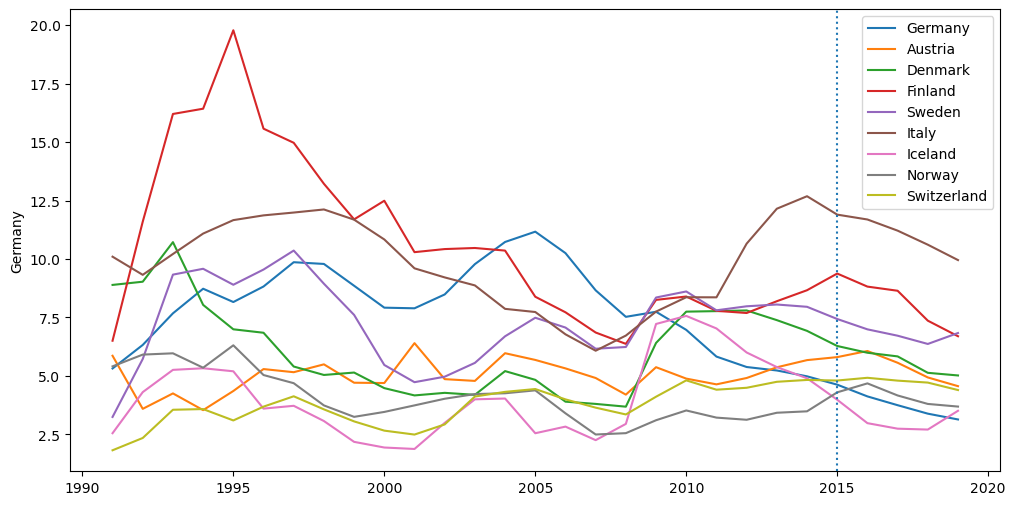

In [102]:
fig, ax = plt.subplots(figsize=(12,6))

for country in df.columns.tolist():
    sns.lineplot(data=df, x=df.index, y=country, label=country, ax=ax)

plt.axvline(x=2015, linestyle=':');

## Synthetic Control

In [103]:
df.head()

,Germany,Austria,Denmark,Finland,Sweden,Italy,Iceland,Norway,Switzerland
1991,5.316,5.86,8.89,6.503,3.243,10.097,2.548,5.407,1.818
1992,6.323,3.59,9.027,11.595,5.722,9.321,4.305,5.91,2.344
1993,7.675,4.25,10.719,16.201,9.33,10.212,5.257,5.965,3.551
1994,8.727,3.535,8.036,16.426,9.58,11.086,5.326,5.349,3.58
1995,8.158,4.353,6.992,19.78,8.897,11.661,5.196,6.307,3.094


In [120]:
y_co = df.drop(columns='Germany')
y_tr = df['Germany']
y_co = y_co[y_co.index >= 2000]
y_tr = y_tr[y_tr.index >= 2000]

y_pre_co = y_co[y_co.index < 2015]
y_pre_tr = y_tr[y_tr.index < 2015]

y_post_co = y_co[y_co.index >= 2015]
y_post_tr = y_tr[y_tr.index >= 2015]

In [121]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(y_pre_co, y_pre_tr)

        # extract the weights
weights_lr = model.coef_
weights_lr.round(3)

array([ 0.307, -0.679,  0.617,  0.827, -0.675, -0.301,  1.086,  0.607])

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

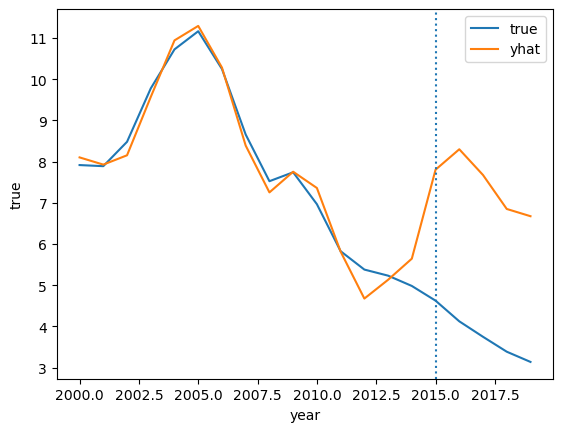

In [122]:
y0_hat = y_co.dot(weights_lr)
df_plot = pd.DataFrame({'year':y_co.index, 'true':y_tr, 'yhat':y0_hat})

fig, ax = plt.subplots()

for c in ['true','yhat']:
    sns.lineplot(data=df_plot, x='year', y=c, label=c, ax=ax)

plt.axvline(x=2015, linestyle=':');

In [108]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import (check_X_y, check_array,
                                               check_is_fitted)
import cvxpy as cp

class SyntheticControl(BaseEstimator, RegressorMixin):

    def __init__(self,):
        pass

    def fit(self, y_pre_co, y_pre_tr):

        y_pre_co, y_pre_tr = check_X_y(y_pre_co, y_pre_tr)
             
        w = cp.Variable(y_pre_co.shape[1])
                 
        objective = cp.Minimize(cp.sum_squares(y_pre_co@w - y_pre_tr))
        constraints = [cp.sum(w) == 1, w >= 0]
                 
        problem = cp.Problem(objective, constraints)
                 
        self.loss_ = problem.solve(verbose=False)
        self.w_ = w.value
                 
        self.is_fitted_ = True
        return self
                 
                 
    def predict(self, y_co):

        check_is_fitted(self)
        y_co = check_array(y_co)
                 
        return y_co @ self.w_

In [123]:
model = SyntheticControl()
model.fit(y_pre_co, y_pre_tr)

# extrac the weights
model.w_.round(3)

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


array([0.28, 0.  , 0.65, 0.07, 0.  , 0.  , 0.  , 0.  ])

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

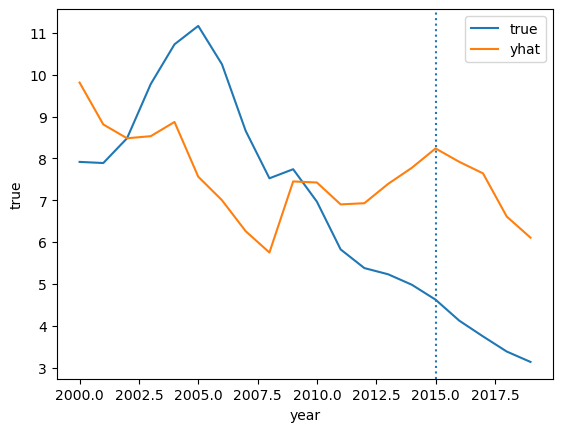

In [124]:
y0_hat = y_co.dot(model.w_)
df_plot = pd.DataFrame({'year':y_co.index, 'true':y_tr, 'yhat':y0_hat})

fig, ax = plt.subplots()

for c in ['true','yhat']:
    sns.lineplot(data=df_plot, x='year', y=c, label=c, ax=ax)

plt.axvline(x=2015, linestyle=':');

## Adding covariate to improve the model

In [162]:
path = r'C:\Users\matte\OneDrive\Desktop\GitHub\data\minimun w eff\gdo_by_country_eu.xlsx'

gdp = pd.read_excel(path)

gdp.head()

,TIME,2019,Unnamed: 2,2018,Unnamed: 4,2017,Unnamed: 6,2016,Unnamed: 8,2015,...,2004,Unnamed: 32,2003,Unnamed: 34,2002,Unnamed: 36,2001,Unnamed: 38,2000,Unnamed: 40
0,Bulgaria,6630,NaN,6330,NaN,6120,NaN,5910,NaN,5700,...,3870,NaN,3620,NaN,3420,NaN,3210,NaN,2990,NaN
1,Czechia,18460,NaN,17990,NaN,17490,NaN,16670,NaN,16290,...,12840,NaN,12260,NaN,11830,NaN,11620,NaN,11230,NaN
2,Denmark,48970,NaN,48450,NaN,47740,NaN,46720,NaN,45630,...,43520,NaN,42490,NaN,42430,NaN,42390,NaN,42190,NaN
3,Estonia,15450,NaN,14920,NaN,14410,NaN,13620,NaN,13230,...,10050,NaN,9350,NaN,8640,NaN,8040,NaN,7540,NaN
4,Ireland,59840,NaN,57610,NaN,53750,NaN,49730,NaN,49420,...,38190,NaN,36390,NaN,35910,NaN,34510,NaN,33280,NaN


In [163]:
gdp = gdp[['TIME']+[str(i) for i in range(2000,2020)]]
gdp.rename(columns={'TIME':'country'}, inplace=True)

gdp.iloc[27:31, :]

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
27,Switzerland,51950,52510,52100,51700,52750,53880,55730,57400,58310,...,57730,58220,58290,58650,59300,59600,60170,60420,61690,61950
28,United Kingdom,27130,27770,28250,29060,29560,30210,30810,31280,30940,...,29830,29960,30190,30660,31290,31780,32060,32430,32640,32910
29,Montenegro,:,:,:,:,:,:,4580,4890,5230,...,5050,5200,5060,5230,5320,5500,5660,5920,6230,6480
30,North Macedonia,2620,2530,2580,2640,2770,2920,3080,3300,3500,...,3650,3750,3750,3880,4030,4190,4330,4390,4540,4750


In [164]:
gdp = gdp.drop(29).reset_index(drop=True)
gdp = gdp.rename(columns={old:new for old, new in zip(gdp.columns.to_list()[1:], range(2000,2020))})
gdp = gdp.T
gdp = gdp.rename(columns=gdp.iloc[0]).drop('country')

In [172]:
new_cols = [f'{i}_gdp' for i in gdp.columns.to_list()]

['Bulgaria_gdp',
 'Czechia_gdp',
 'Denmark_gdp',
 'Estonia_gdp',
 'Ireland_gdp',
 'Greece_gdp',
 'Spain_gdp',
 'France_gdp',
 'Croatia_gdp',
 'Italy_gdp',
 'Cyprus_gdp',
 'Latvia_gdp',
 'Lithuania_gdp',
 'Luxembourg_gdp',
 'Hungary_gdp',
 'Malta_gdp',
 'Netherlands_gdp',
 'Austria_gdp',
 'Poland_gdp',
 'Portugal_gdp',
 'Romania_gdp',
 'Slovenia_gdp',
 'Slovakia_gdp',
 'Finland_gdp',
 'Sweden_gdp',
 'Iceland_gdp',
 'Norway_gdp',
 'Switzerland_gdp',
 'United Kingdom_gdp',
 'North Macedonia_gdp',
 'Albania_gdp',
 'Serbia_gdp',
 'Türkiye_gdp',
 'Belgium_gdp',
 'Germany_gdp']

In [173]:
gdp = gdp/10000
new_cols = [f'{i}_gdp' for i in gdp.columns.to_list()]

gdp = gdp.rename(columns={old:new for old,new in zip(gdp.columns.to_list(), new_cols)})

In [187]:
for datafr in [gdp, df]:
    for c in datafr.columns.to_list():
        datafr[c] = datafr[c].astype(float)

In [174]:
gdp.head()

,Bulgaria_gdp,Czechia_gdp,Denmark_gdp,Estonia_gdp,Ireland_gdp,Greece_gdp,Spain_gdp,France_gdp,Croatia_gdp,Italy_gdp,...,Iceland_gdp,Norway_gdp,Switzerland_gdp,United Kingdom_gdp,North Macedonia_gdp,Albania_gdp,Serbia_gdp,Türkiye_gdp,Belgium_gdp,Germany_gdp
2000,0.299,1.123,4.219,0.754,3.328,1.743,2.146,2.893,0.794,2.743,...,2.857,6.204,5.195,2.713,0.262,0.17,0.265,0.613,2.989,2.891
2001,0.321,1.162,4.239,0.804,3.451,1.805,2.219,2.929,0.851,2.795,...,2.931,6.3,5.251,2.777,0.253,0.185,0.284,0.57,3.011,2.937
2002,0.342,1.183,4.243,0.864,3.591,1.869,2.243,2.941,0.899,2.796,...,2.922,6.353,5.21,2.825,0.258,0.194,0.302,0.599,3.049,2.929
2003,0.362,1.226,4.249,0.935,3.639,1.973,2.268,2.944,0.95,2.785,...,2.967,6.375,5.17,2.906,0.264,0.206,0.316,0.626,3.068,2.91
2004,0.387,1.284,4.352,1.005,3.819,2.067,2.302,3.005,0.989,2.804,...,3.162,6.592,5.275,2.956,0.277,0.218,0.346,0.679,3.164,2.947


In [165]:
df.head()

,Germany,Austria,Denmark,Finland,Sweden,Italy,Iceland,Norway,Switzerland
1991,5.316,5.86,8.89,6.503,3.243,10.097,2.548,5.407,1.818
1992,6.323,3.59,9.027,11.595,5.722,9.321,4.305,5.91,2.344
1993,7.675,4.25,10.719,16.201,9.33,10.212,5.257,5.965,3.551
1994,8.727,3.535,8.036,16.426,9.58,11.086,5.326,5.349,3.58
1995,8.158,4.353,6.992,19.78,8.897,11.661,5.196,6.307,3.094


In [195]:
import statsmodels.formula.api as smf

c = 'France_gdp'

df_reg = pd.merge(df[df.index >= 2000]['Germany'], gdp[[c]], left_index=True, right_index=True)

result = smf.ols(f'Germany ~ {c}', data=df_reg).fit()

result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,41.7722,7.447,5.609,0.000,26.127,57.417
Belgium_gdp,-10.5552,2.249,-4.692,0.000,-15.281,-5.829


c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

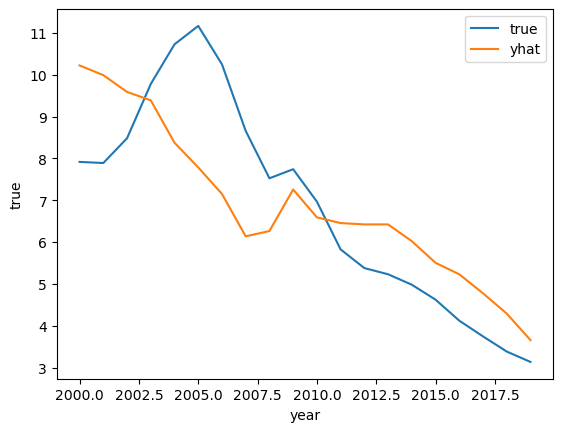

In [199]:
yhat = result.predict(df_reg[c])
df_plot = pd.DataFrame({'year':df_reg.index, 'true':df_reg['Germany'],
                        'yhat':yhat})

fig, ax = plt.subplots()

for i in ['true', 'yhat']:
    sns.lineplot(data=df_plot, x='year', y=i, label=i, ax=ax)